<a href="https://colab.research.google.com/github/Khurram19/DL-Cat-vs-Dogs/blob/master/DL_Chap_2_Cats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 2.8MB/s 
     |████████████████████████████████| 51kB 5.5MB/s 
     |████████████████████████████████| 194kB 9.2MB/s 
     |████████████████████████████████| 1.0MB 13.4MB/s 
     |████████████████████████████████| 51kB 5.9MB/s 
     |████████████████████████████████| 92kB 8.5MB/s 
     |████████████████████████████████| 40kB 4.9MB/s 
     |████████████████████████████████| 51kB 6.1MB/s 
     |████████████████████████████████| 51kB 6.5MB/s 
     |████████████████████████████████| 61kB 6.6MB/s 
     |████████████████████████████████| 2.6MB 17.4MB/s 
Mounted at /content/gdrive


In [4]:
from fastbook import *

In [5]:
!pip install fastai

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#!unrar x "/content/drive/My Drive/Data Set/CAT_00.rar" "/content/drive/My Drive/Data Set/cat/"

In [7]:
fns = get_image_files('/content/drive/My Drive/Data Set/test_set/')

In [8]:
cats = DataBlock(
 blocks=(ImageBlock, CategoryBlock),
 get_items=get_image_files,
 splitter=RandomSplitter(valid_pct=0.2, seed=42),
 get_y=parent_label,
 item_tfms=Resize(128))

In [9]:
get_items=get_image_files

In [10]:
splitter=RandomSplitter(valid_pct=0.2, seed=42)

In [11]:
get_y=parent_label


In [12]:
item_tfms=Resize(128)


In [13]:
dls = cats.dataloaders('/content/drive/My Drive/Data Set/test_set/')

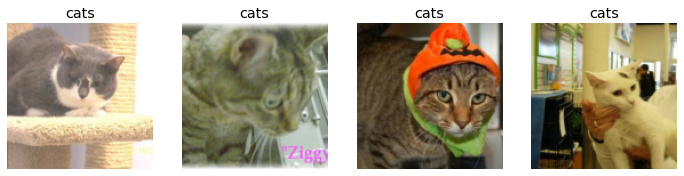

In [14]:
dls.valid.show_batch(max_n=4, nrows=1)

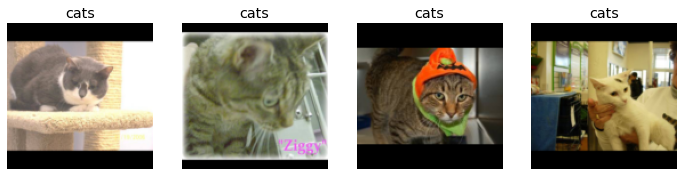

In [15]:
cats = cats.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = cats.dataloaders('/content/drive/My Drive/Data Set/test_set/')
dls.valid.show_batch(max_n=4, nrows=1)


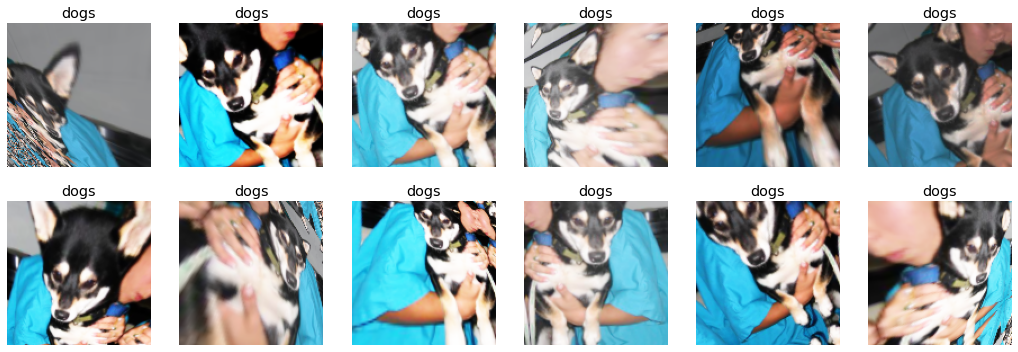

In [ ]:
#DATA AUGMENTATION
cats = cats.new(item_tfms=Resize(128),
batch_tfms=aug_transforms(mult=3))
dls = cats.dataloaders('/content/drive/My Drive/Data Set/test_set/')
dls.train.show_batch(max_n=12, nrows=2, unique=True)

In [ ]:
#STARTING TO TRAIN DATA

In [16]:
cats = cats.new(item_tfms=RandomResizedCrop(200, min_scale=0.5), batch_tfms=aug_transforms())
dls = cats.dataloaders('/content/drive/My Drive/Data Set/test_set')


In [17]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


epoch,train_loss,valid_loss,error_rate,time
0,0.835718,0.161205,0.062500,01:07


epoch,train_loss,valid_loss,error_rate,time
0,0.206688,0.106272,0.012500,01:18
1,0.180196,0.105108,0.025000,01:15
2,0.142090,0.100392,0.025000,01:17
3,0.128447,0.098536,0.037500,01:16


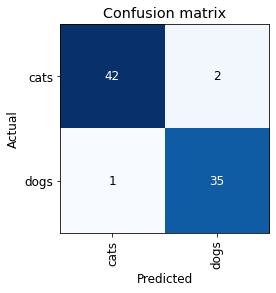

In [18]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

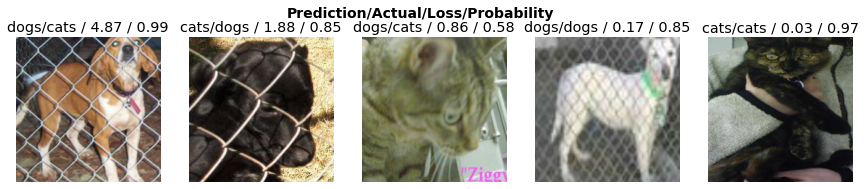

In [19]:
interp.plot_top_losses(5, nrows=1)

In [ ]:
cleaner = ImageClassifierCleaner(learn)

NameError: ignored

In [1]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()

NameError: ignored

In [22]:
learn.export()

In [23]:
path = Path()
path.ls(file_exts='.pkl')


(#1) [Path('export.pkl')]

In [24]:
learn_inf = load_learner(path/'export.pkl')


In [31]:
learn_inf.predict('/content/drive/My Drive/Data Set/test_set/cats/cat.4001.jpg')

('cats', tensor(0), tensor([9.9997e-01, 2.7092e-05]))

In [32]:
learn_inf.dls.vocab

(#2) ['cats','dogs']

In [ ]:
#CREATING A NOTEBOOK APP

In [33]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [35]:
img = PILImage.create(btn_upload.data[-1])


In [36]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [37]:
pred,pred_idx,probs = learn_inf.predict(img)


In [39]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: cats; Probability: 0.9996')

In [ ]:
#CLASSIFICATION

In [40]:
btn_run = widgets.Button(description='Classify')
btn_run


Button(description='Classify', style=ButtonStyle())

In [42]:
def on_click_classify(change):
 img = PILImage.create(btn_upload.data[-1])
 out_pl.clear_output()
 with out_pl: display(img.to_thumb(128,128))
 pred,pred_idx,probs = learn_inf.predict(img)
 lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
btn_run.on_click(on_click_classify)


In [46]:
from ipywidgets import *

In [47]:
VBox([widgets.Label('Select your pet!'), btn_upload, btn_run, out_pl, lbl_pred])
